In [33]:
import numpy as np
import pandas as pd
import os
import seaborn as sns

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, log_loss, accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


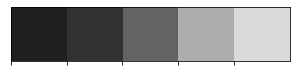

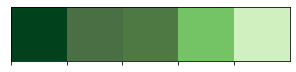

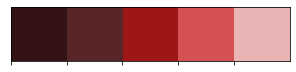

In [35]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)

In [5]:
directory = '/content/drive/MyDrive/brain_tumor/Training'
directory2 = '/content/drive/MyDrive/brain_tumor/Testing'

In [6]:
File=[]
for file in os.listdir(directory):
    File+=[file]
print(File)

['pituitary_tumor', 'no_tumor', 'glioma_tumor', 'meningioma_tumor']


In [7]:
dataset=[]
mapping={'no_tumor':0, 'pituitary_tumor':1, 'meningioma_tumor':2, 'glioma_tumor':3}
count=0

for file in os.listdir(directory):
    path=os.path.join(directory,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(150,150))
        image=img_to_array(image)
        image=image/255.0
        dataset.append([image,count])     
    count=count+1

In [8]:
testset=[]
mapping={'no_tumor':0, 'pituitary_tumor':1, 'meningioma_tumor':2, 'glioma_tumor':3}
count=0

for file in os.listdir(directory2):
    path=os.path.join(directory2,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(150,150))
        image=img_to_array(image)
        image=image/255.0
        testset.append([image,count])         
    count=count+1

In [9]:
data,labels0=zip(*dataset)
test,testlabels0=zip(*testset)

In [10]:
labels1=to_categorical(labels0)
data=np.array(data)
labels=np.array(labels1)
print(data.shape)
print(labels.shape)

(2890, 150, 150, 3)
(2890, 4)


In [11]:
testlabels1=to_categorical(testlabels0)
test=np.array(test)
testlabels=np.array(testlabels1)
print(test.shape)
print(testlabels.shape)

(404, 150, 150, 3)
(404, 4)


In [12]:
data2=data.reshape(-1,150,150,3)
test2=test.reshape(-1,150,150,3)

In [13]:
trainx,testx,trainy,testy=train_test_split(data,labels,test_size=0.2,random_state=44)

In [14]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(2312, 150, 150, 3)
(578, 150, 150, 3)
(2312, 4)
(578, 4)


In [15]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                    width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

In [16]:
pretrained_model3 = tf.keras.applications.DenseNet201(input_shape=(150,150,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

74850304/74836368 [==============================] - 1s 0us/step


In [17]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(4, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=30)

Epoch 1/30
73/73 [==============================] - 315s 4s/step - loss: 0.7877 - accuracy: 0.6942 - val_loss: 0.7400 - val_accuracy: 0.7405
Epoch 2/30
73/73 [==============================] - 298s 4s/step - loss: 0.5212 - accuracy: 0.7984 - val_loss: 0.7977 - val_accuracy: 0.7249
Epoch 3/30
73/73 [==============================] - 309s 4s/step - loss: 0.4748 - accuracy: 0.8179 - val_loss: 0.4796 - val_accuracy: 0.8218
Epoch 4/30
73/73 [==============================] - 304s 4s/step - loss: 0.4494 - accuracy: 0.8279 - val_loss: 0.5178 - val_accuracy: 0.7889
Epoch 5/30
73/73 [==============================] - 306s 4s/step - loss: 0.4255 - accuracy: 0.8361 - val_loss: 0.6132 - val_accuracy: 0.7820
Epoch 6/30
73/73 [==============================] - 310s 4s/step - loss: 0.4105 - accuracy: 0.8447 - val_loss: 0.6011 - val_accuracy: 0.7751
Epoch 7/30
73/73 [==============================] - 302s 4s/step - loss: 0.3644 - accuracy: 0.8638 - val_loss: 0.5912 - val_accuracy: 0.7958
Epoch 8/30
73

In [19]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       0.79      0.98      0.87       162
           1       0.88      0.84      0.86        75
           2       0.95      0.83      0.89       169
           3       0.82      0.75      0.78       172

    accuracy                           0.85       578
   macro avg       0.86      0.85      0.85       578
weighted avg       0.86      0.85      0.85       578



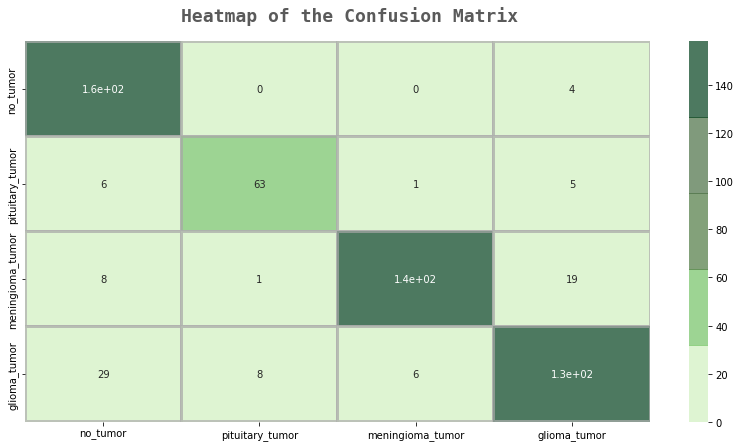

In [37]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(ground,pred),ax=ax,xticklabels=mapping,yticklabels=mapping,annot=True,
           cmap=colors_green[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3])
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8)

plt.show()

In [26]:
train_pred = model.predict(trainx)
train_pred = np.argmax(train_pred, axis=1)
Y_train_ = np.argmax(trainy, axis=1)
print("Accuracy on training set: {:.2f}%".format(np.sum(train_pred==Y_train_)/len(Y_train_)*100))

Accuracy on training set: 90.22%


In [27]:
test_pred = model.predict(testx)
test_pred = np.argmax(test_pred, axis=1)
Y_test_ = np.argmax(testy, axis=1)
print("Accuracy on testing set: {:.2f}%".format(np.sum(test_pred==Y_test_)/len(Y_test_)*100))

Accuracy on testing set: 84.95%


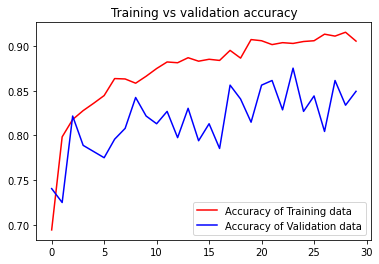

<Figure size 432x288 with 0 Axes>

In [20]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

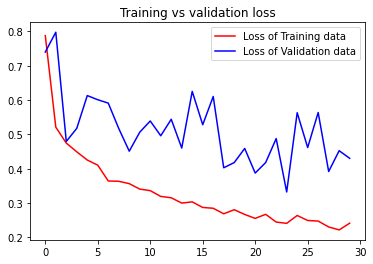

<Figure size 432x288 with 0 Axes>

In [21]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

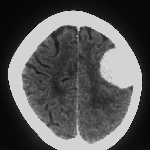

In [28]:
load_img("/content/drive/MyDrive/brain_tumor/Testing/meningioma_tumor/image(113).jpg",target_size=(150,150))

In [29]:
image=load_img("/content/drive/MyDrive/brain_tumor/Testing/meningioma_tumor/image(113).jpg",target_size=(150,150))

image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)

In [32]:
reverse_mapping={0:'pituitary_tumor', 1:'no_tumor', 2:'glioma_tumor', 3:'meningioma_tumor'}

def mapper(value):
    return reverse_mapping[value]

prediction=model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print("Prediction is {}.".format(move_name))

Prediction is meningioma_tumor.
